#시도 구군별 교통사고 현황 알아보기
**교통사고가 가장 많이 발생하는 도시는 어디인가?**

#####1)사고건수 평균을 기준으로 상위 5개 도시에 대한 중상자수, 경상자수, 부상신고자수 평균을 비교하시오.
#####2)사망자수 평균 비율이 가장 많은/가장 적은 도시는 어디인가?
#####3)중상자수 평균 비율이 많은 상위 5개 도시는 어디인가?
#####4)모든 지역의 사망자수와 중상자수의 분포를 확인하시오.


###1.시도 구군별 교통사고 데이터 읽어오기
- URL:https://www.data.go.kr/data/15070297/fileData.do
- 도로교통공단_시도 시군구별 교통사고 통계

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#라이브러리 가져오기
import pandas as pd

In [47]:
#도로교통공단_시도 시군구별 교통사고 통계_사고사망.csv 화일 읽고 상위 5개 데이터 확인하기
#변수명 = pd.read_csv(‘파일경로명’, encoding=‘인코딩방식’)
#인코딩방식 :EUC_KR(한글이 포함된 일반적인 경우)/cp949(MS office에서 저장한 파일 형식)

사고사망 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/진선우WS1/7주차/도로교통공단_시도 시군구별 교통사고 통계_사고사망.csv", encoding="EUC_KR")
사고사망.head()

,시도,시군구,사고건수,사망자수
0,서울,종로구,974,3
1,서울,중구,943,2
2,서울,용산구,1014,11
3,서울,성동구,948,8
4,서울,동대문구,1534,12


In [ ]:
#도로교통공단_시도 시군구별 교통사고 통계_기타.csv 화일 읽고 상위 5개 데이터 확인하기
#변수명 = pd.read_csv(‘파일경로명’, encoding=‘인코딩방식’)
#인코딩방식 :EUC_KR(한글이 포함된 일반적인 경우)/cp949(MS office에서 저장한 파일 형식)

기타 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/7주차/도로교통공단_시도 시군구별 교통사고 통계_기타.csv", encoding ="EUC-KR")
기타.head()

,광역지방자치,기초지방자치,중상자수,경상자수,부상신고자수
0,서울,종로구,224,1006,121
1,서울,중구,246,866,100
2,서울,용산구,250,1037,43
3,서울,성동구,226,941,55
4,서울,동대문구,367,1308,168


In [ ]:
#기타 변수의 열이름 바꾸기
#광역지방자치 → 시도, 기초지방자치 → 시군구
#테이블에 변경된 이름 적용하기

기타.rename(columns={"광역지방자치":"시도", "기초지방자치":"시군구"}, inplace=True)
기타.head()

,시도,시군구,중상자수,경상자수,부상신고자수
0,서울,종로구,224,1006,121
1,서울,중구,246,866,100
2,서울,용산구,250,1037,43
3,서울,성동구,226,941,55
4,서울,동대문구,367,1308,168


In [ ]:
#동일한 열이름을 기준으로 두 데이터 합치기(열방향)

accData = pd.merge(사고사망, 기타, on=["시도", "시군구"])
accData

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,974,3,224,1006,121
1,서울,중구,943,2,246,866,100
2,서울,용산구,1014,11,250,1037,43
3,서울,성동구,948,8,226,941,55
4,서울,동대문구,1534,12,367,1308,168
...,...,...,...,...,...,...,...
224,울산,남구,1094,5,336,997,90
225,울산,동구,501,2,181,410,31
226,울산,북구,802,10,244,910,93
227,울산,울주군,660,11,239,647,119


###2.시도 구군별 교통사고 데이터 확인하기

In [ ]:
#행열개수, 데이터 타입, 열의 개수 등 데이터 정보 확인하기

accData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      229 non-null    object
 1   시군구     229 non-null    object
 2   사고건수    229 non-null    int64 
 3   사망자수    229 non-null    int64 
 4   중상자수    229 non-null    int64 
 5   경상자수    229 non-null    int64 
 6   부상신고자수  229 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.3+ KB


In [ ]:
#수치형 데이터에 대한 통계(최대, 최소, 평균등) 자료 확인하기

accData.describe()

,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,859.545852,11.943231,225.829694,927.641921,77.109170
std,882.688012,9.333552,197.117922,988.101442,102.368964
min,15.000000,0.000000,9.000000,13.000000,0.000000
25%,209.000000,6.000000,85.000000,213.000000,12.000000
50%,584.000000,9.000000,180.000000,620.000000,38.000000
75%,1165.000000,15.000000,285.000000,1231.000000,99.000000
max,4705.000000,61.000000,1085.000000,5055.000000,619.000000


In [ ]:
#하위 10개 데이터 확인하기
#변수명.tail() : 아래서 5행 보기 / 변수명.tail(3) : 아래서에서 3행 보기

accData.tail(10)

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
219,대전,중구,1024,5,221,1217,31
220,대전,서구,2302,9,470,2717,52
221,대전,유성구,1645,13,336,2031,105
222,대전,대덕구,923,10,190,1056,55
223,울산,중구,603,4,181,649,50
224,울산,남구,1094,5,336,997,90
225,울산,동구,501,2,181,410,31
226,울산,북구,802,10,244,910,93
227,울산,울주군,660,11,239,647,119
228,세종,세종시,932,17,234,744,352


###3.시도 구군별 교통사고 데이터 재정리하기

#####1)시도별 사고건수, 사망자수, 중상자수, 경상자수, 부상신고자수 평균 살펴보기

In [ ]:
#데이터 그룹화하여 간단한 통계 확인하기
#변수명.groupby('그룹열이름') [['열이름1','열이름2']]. 통계함수()
#그룹열이름 : 그룹화할 열의 이름
#열이름: 그룹별로 통계 데이터를 확인하고자 하는 열의 이름

시도별 = accData.groupby('시도')[['사고건수','사망자수','중상자수','경상자수','부상신고자수']].mean()
시도별

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
강원,356.944444,7.722222,106.111111,420.722222,37.611111
경기,1708.645161,17.645161,393.580645,1914.935484,187.516129
경남,589.500000,14.333333,227.333333,530.388889,50.333333
경북,479.869565,13.434783,173.869565,494.043478,35.956522
광주,1424.400000,11.600000,217.600000,1834.200000,92.600000
대구,1387.750000,8.500000,337.875000,1477.750000,149.500000
대전,1368.200000,10.200000,286.600000,1631.000000,52.400000
부산,680.125000,7.062500,213.750000,657.062500,56.000000
서울,1347.920000,8.840000,309.600000,1373.880000,129.680000


#####2)'시도'열이 index 열로 설정되어 있으므로 index 정리하기

In [ ]:
#인덱스 재설정
#변수명.reset_index(inplace=True)
#drop=True 옵션은 기존 인덱스는 버리고 새로 인덱스 설정
#상위데이터 10개 확인

시도별.reset_index(inplace=True)
시도별.head(10)

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,356.944444,7.722222,106.111111,420.722222,37.611111
1,경기,1708.645161,17.645161,393.580645,1914.935484,187.516129
2,경남,589.500000,14.333333,227.333333,530.388889,50.333333
3,경북,479.869565,13.434783,173.869565,494.043478,35.956522
4,광주,1424.400000,11.600000,217.600000,1834.200000,92.600000
5,대구,1387.750000,8.500000,337.875000,1477.750000,149.500000
6,대전,1368.200000,10.200000,286.600000,1631.000000,52.400000
7,부산,680.125000,7.062500,213.750000,657.062500,56.000000
8,서울,1347.920000,8.840000,309.600000,1373.880000,129.680000
9,세종,932.000000,17.000000,234.000000,744.000000,352.000000


###4.시각적으로 분석하며 질문에 답하기

####1)한글 지원하기

In [ ]:
#차트에 한글 지원하기
!pip install koreanize-matplotlib
import koreanize_matplotlib

####2)차트를 생성하기 위한 라이브러리 읽어오기


In [ ]:
import matplotlib.pyplot as plt

####3)사고건수 평균을 기준으로 상위 5위의 도시에 대한 중상자수, 경상자수, 부상신고자수 평균을 비교하시오.





#####-사고건수 평균을 기준으로 상위 5위의 도시 검색하기

In [ ]:
#데이터 정렬(사고건수 평균이 큰 순서대로)
#변수명.sort_values(‘정렬기준 열이름’, ascending=True)
#ascending = True:오름차순, False:내림차순, 생략:오름차순
#top5에는 상위 5개의 도시만 들어있어야 함

사고top5 = 시도별.sort_values('사고건수', ascending=False).head()
사고top5

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
14,제주,2019.500000,26.500000,533.500000,2101.500000,375.500000
1,경기,1708.645161,17.645161,393.580645,1914.935484,187.516129
4,광주,1424.400000,11.600000,217.600000,1834.200000,92.600000
5,대구,1387.750000,8.500000,337.875000,1477.750000,149.500000
6,대전,1368.200000,10.200000,286.600000,1631.000000,52.400000


#####-사고건수 평균을 기준으로 상위 5위의 도시(top5)에 대한 경상자수, 중상자수, 부상신고자수 평균을 세로 막대차트로 비교하기

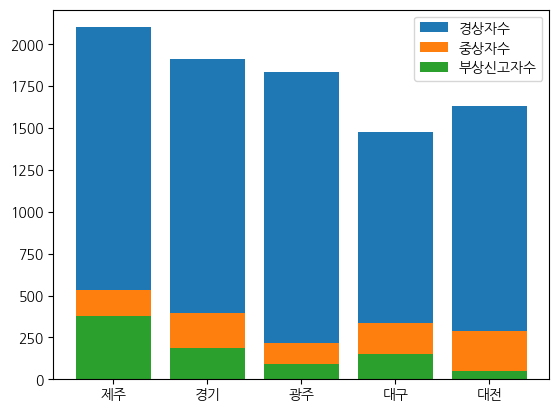

In [ ]:
#세로 bar 차트 생성하기
#plt.bar(데이터, 속성들) ← 속성들은 필요한 경우에만 작성
  #데이터: x축과 y축에 표현할 데이터들
  #width=실수: 막대 두께 설정(0~1) ← 속성 예
  #alpha=실수: 막대차트의 투명도(0~1) ← 속성 예

#plt.legend() :지정한 범례(label)를 차트내에 표시

plt.bar(사고top5['시도'], 사고top5['경상자수'], label = '경상자수')
plt.bar(사고top5['시도'], 사고top5['중상자수'], label = '중상자수')
plt.bar(사고top5['시도'], 사고top5['부상신고자수'], label = '부상신고자수')
plt.legend()
plt.show()

#####-중상자수를 나타내기 위해 각 항목들을 별도의 막대로 표시하기

In [ ]:
#눈금을 생성하기 위한 데이터 연산 라이브러리
import numpy as np

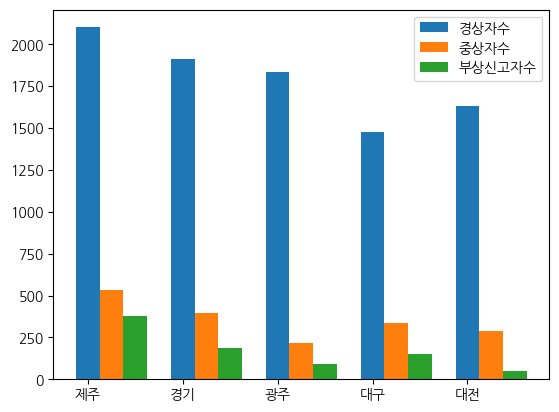

In [ ]:
#plt.xticks(눈금값, 레이블): x,축에 표시할 눈금 지정
#눈금값: x, y축 눈금에 표시할 값
#레이블: 눈금값으로 표시할 레이블로 튜플이나 리스트로 설정

pos = np.array(range(len(사고top5['시도'])))  #len(5)도 가능
plt.xticks(pos, 사고top5['시도'])       #pos 리스트의 각 index에 '시도'데이터 저장

plt.bar(pos, 사고top5['경상자수'], label = '경상자수', width=0.25)
plt.bar(pos+0.25, 사고top5['중상자수'], label = '중상자수', width=0.25)
plt.bar(pos+0.5, 사고top5['부상신고자수'], label = '부상신고자수', width=0.25)
plt.legend()
plt.show()

#####-차트 꾸미기

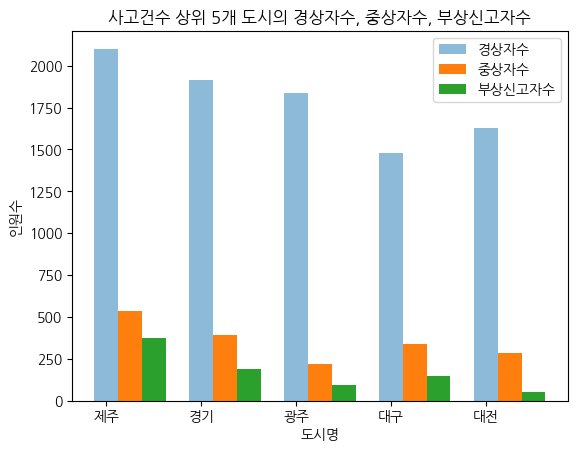

In [ ]:
#title : 사고건수 상위 5개 도시의 경상자수, 중상자수, 부상신고자수
#X축: 도시명, Y축: 인원수
#경상자수 투명도 조절
#plt.title('차트제목') :지정한 차트제목을 차트 중앙 상단에 표시
#plt.xlabel('x축제목') : x축의 제목을 지정한 문자열로 설정
#plt.ylabel('y축제목') : y축의 제목을 지정한 문자열로 설정

pos = np.array(range(len(사고top5['시도'])))  #len(5)도 가능
plt.xticks(pos, 사고top5['시도'])       #pos 리스트의 각 index에 '시도'데이터 저장

plt.bar(pos, 사고top5['경상자수'], label = '경상자수', width=0.25, alpha=0.5)
plt.bar(pos+0.25, 사고top5['중상자수'], label = '중상자수', width=0.25)
plt.bar(pos+0.5, 사고top5['부상신고자수'], label = '부상신고자수', width=0.25)
plt.legend()

plt.title('사고건수 상위 5개 도시의 경상자수, 중상자수, 부상신고자수')
plt.xlabel('도시명')
plt.ylabel('인원수')
plt.show()

#####-사고건수 상위 5개 도시의 경상자수, 중상자수, 부상신고자수를 가로 막대로 변경하기

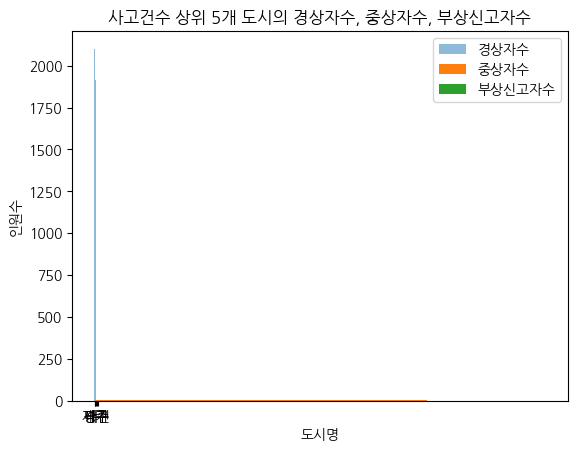

In [ ]:
#plt.barh(데이터, 속성들): 가로 막대차트 생성
#plt.bar()에 'h'만 추가 → plt.barh()
#속성들은 유사. 단, width → height, plt.xticks() → plt.yticks()
#height=실수: 막대 높이 설정

pos = np.array(range(len(사고top5['시도'])))  #len(5)도 가능
plt.xticks(pos, 사고top5['시도'])       #pos 리스트의 각 index에 '시도'데이터 저장

plt.bar(pos, 사고top5['경상자수'], label = '경상자수', width=0.25, alpha=0.5)
plt.barh(pos+0.25, 사고top5['중상자수'], label = '중상자수', height=0.25)
plt.barh(pos+0.5, 사고top5['부상신고자수'], label = '부상신고자수', height=0.25)
plt.legend()

plt.title('사고건수 상위 5개 도시의 경상자수, 중상자수, 부상신고자수')
plt.xlabel('도시명')
plt.ylabel('인원수')
plt.show()

####4)사망자수 평균 비율이 가장 많은 도시는 어디인가?






######-도시의 사망자수에 대한 구성비 확인하기

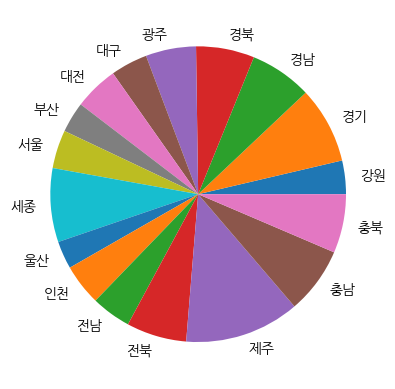

In [ ]:
#pie 차트 만들기
#plt.pie(데이터, 속성들)
#데이터: 데이터의 구성비를 확인하기 위한 데이터 (시도별 사망자수 데이터 사용)
#labels='문자열': 각 영역의 값을 나타내는 레이블 문자열 (※label아니고 labels)
#autopct='양식문자': 비율을 나타낼 숫자 형식
#colors=리스트: 각 영역의 색상

plt.pie(시도별['사망자수'], labels=시도별['시도'])
plt.show()

In [ ]:
시도별 #제주가 몇번째 데이터인지 확인

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,356.944444,7.722222,106.111111,420.722222,37.611111
1,경기,1708.645161,17.645161,393.580645,1914.935484,187.516129
2,경남,589.500000,14.333333,227.333333,530.388889,50.333333
3,경북,479.869565,13.434783,173.869565,494.043478,35.956522
4,광주,1424.400000,11.600000,217.600000,1834.200000,92.600000
5,대구,1387.750000,8.500000,337.875000,1477.750000,149.500000
6,대전,1368.200000,10.200000,286.600000,1631.000000,52.400000
7,부산,680.125000,7.062500,213.750000,657.062500,56.000000
8,서울,1347.920000,8.840000,309.600000,1373.880000,129.680000
9,세종,932.000000,17.000000,234.000000,744.000000,352.000000


#####-제주 지역의 조각 분리하기

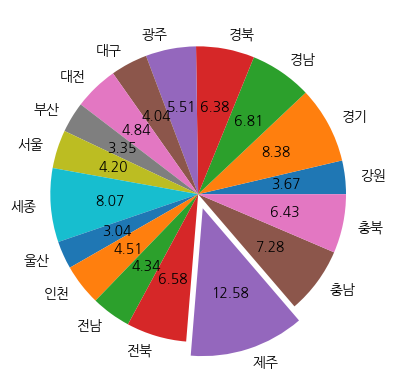

In [ ]:
#explode=리스트: 부채꼴이 중심에서 벗어나는 정도

exp=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0] #테이블 순서대로 작성
plt.pie(시도별['사망자수'], labels=시도별['시도'], autopct='%.2f', explode=exp)
plt.show()

####5)사망자수 평균 비율이 가장 많은 도시는 어디인가?

#####-중상자수 평균이 많은 상위 5개 도시의 구성비 확인하기

In [ ]:
#시도별 중상자수를 기준으로 내림차순한 후 상위 5개 저장하기

중상자top5 = 시도별.sort_values('중상자수', ascending=False).head()
중상자top5

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
14,제주,2019.500000,26.500000,533.500000,2101.500000,375.500000
1,경기,1708.645161,17.645161,393.580645,1914.935484,187.516129
5,대구,1387.750000,8.500000,337.875000,1477.750000,149.500000
8,서울,1347.920000,8.840000,309.600000,1373.880000,129.680000
6,대전,1368.200000,10.200000,286.600000,1631.000000,52.400000


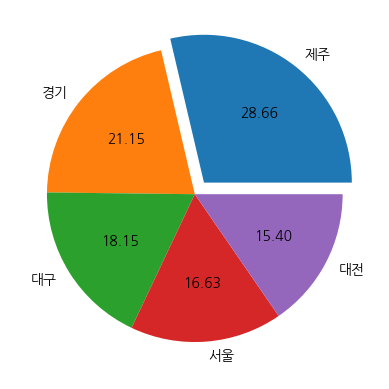

In [ ]:
#pie 차트를 이용하여 구성비율 나타내기

exp=[0.1,0,0,0,0] #제주에 해당하는 내용 꺼내기
plt.pie(중상자top5['중상자수'], labels = 중상자top5['시도'], autopct='%.2f', explode=exp)
plt.show()

####6)모든 지역의 사망자수와 중상자수의 분포를 확인하시오.

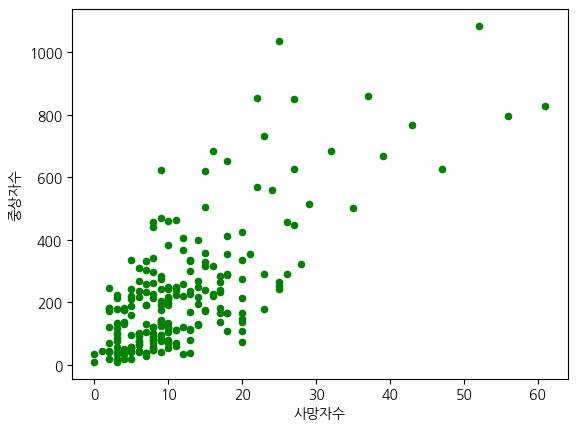

In [ ]:
#모든 지역(accData 사용)의 사망자수와 중상자수의 관계를 scatter 차트를 활용하여 분포 확인하기
#plt.scatter(데이터, 속성들)
#데이터: 분포를 확인하기 위한 열이름
#c='색상': 점들의 색상
#s='크기': 점들의 크기

plt.scatter(accData['사망자수'], accData['중상자수'], c='g', s=20)
plt.xlabel('사망자수')
plt.ylabel('중상자수')
plt.show()